In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
df = pd.read_excel('Compiled data.xlsx')
df['Total_Generation'] = df['Generation_1'] + df['Generation_2'] + df['Generation_3']
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]

# Drop the unnamed columns
df = df.drop(columns=unnamed_columns)

df.head(10)

,Date,Time_Interval,Consumption_B1,Consumption_B2,Consumption_B3,Generation_1,Generation_2,Generation_3,Gb(i),Gd(i),Gr(i),Temperature (c),relative_humidity_2m (%),dew_point_2m (¬∞C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),Total_Consumption,Total_Generation
0,2019-01-01,30,263.934730,119.965555,100.382488,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.24,87,-1.7,0.0,56,7.2,484.282773,0.000000
1,2019-01-01,130,261.381617,126.873583,98.777157,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.33,87,-1.6,0.0,100,7.6,487.032358,0.000000
2,2019-01-01,230,289.598378,130.980467,109.956200,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.36,88,-1.5,0.0,94,5.9,530.535045,0.000000
3,2019-01-01,330,340.806009,143.535150,129.512557,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.21,88,-1.6,0.0,88,5.5,613.853717,0.000000
4,2019-01-01,430,399.536718,174.588548,150.485312,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.03,88,-1.7,0.0,81,6.4,724.610577,0.000000
5,2019-01-01,530,359.570304,251.327078,135.929211,0.000000,0.000000,0.000000,0.0,0.00,0.00,-0.49,91,-1.9,0.0,67,5.1,746.826593,0.000000
6,2019-01-01,630,352.059444,247.050640,147.602814,0.000000,0.000000,0.000000,0.0,15.29,0.58,-0.56,90,-2.1,0.0,75,4.8,746.712898,0.000000
7,2019-01-01,730,344.880960,239.038966,147.823253,0.000000,0.650407,0.000000,0.0,38.27,1.44,0.05,90,-1.5,0.0,86,3.2,731.743179,0.650407
8,2019-01-01,830,329.569168,237.915318,135.971290,14.358974,254.634146,17.341256,0.0,75.57,2.84,-0.19,92,-1.4,0.0,89,4.3,703.455776,286.334376
9,2019-01-01,930,314.838795,230.916968,129.750366,70.618401,644.552846,85.285463,0.0,93.85,3.53,0.43,88,-1.3,0.0,80,4.2,675.506128,800.456710


# Checking for Missing and Duplicate Data

In [11]:
print(df.isnull().sum())
print()
print('Number of duplicated data', df.duplicated().sum())


Date                        0
Time_Interval               0
Consumption_B1              0
Consumption_B2              0
Consumption_B3              0
Generation_1                0
Generation_2                0
Generation_3                0
Gb(i)                       0
Gd(i)                       0
Gr(i)                       0
Temperature (c)             0
relative_humidity_2m (%)    0
dew_point_2m (¬∞C)          0
precipitation (mm)          0
cloud_cover (%)             0
wind_speed_10m (km/h)       0
Total_Consumption           0
Total_Generation            0
dtype: int64

Number of duplicated data 0


# Outlier Detection

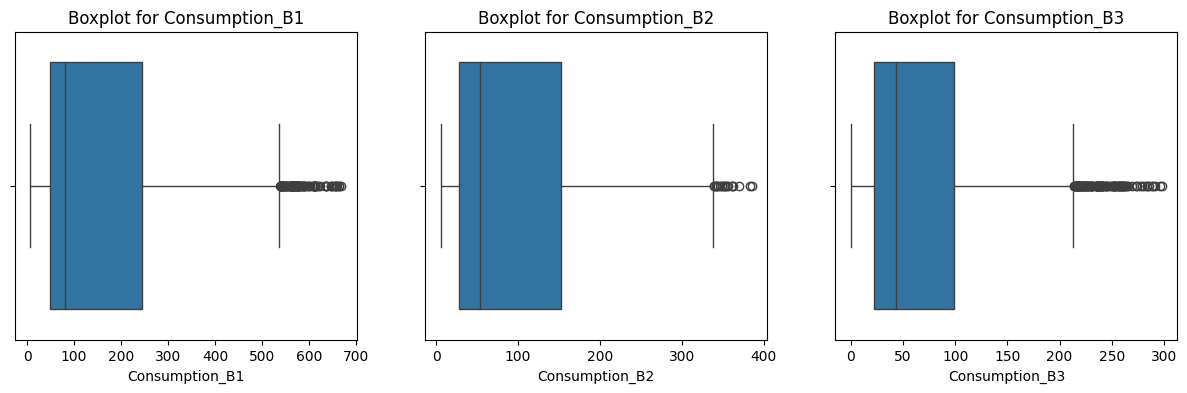

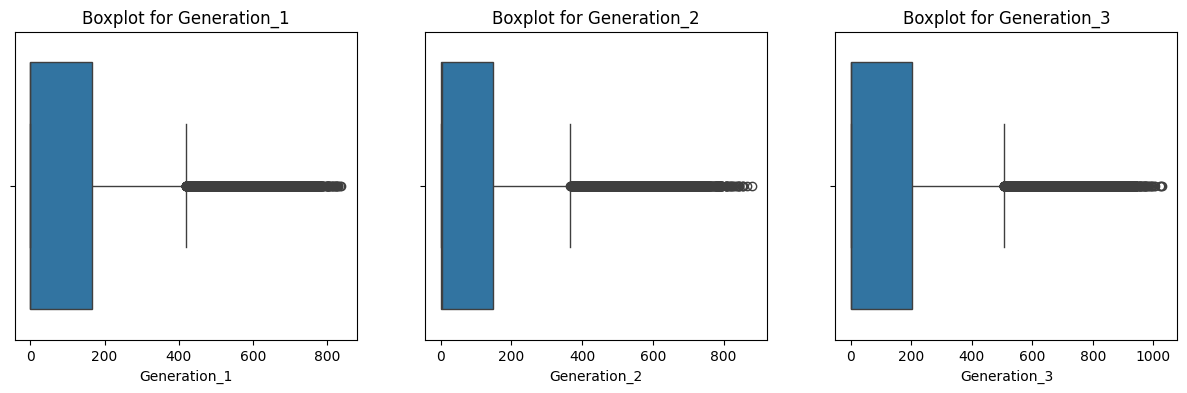

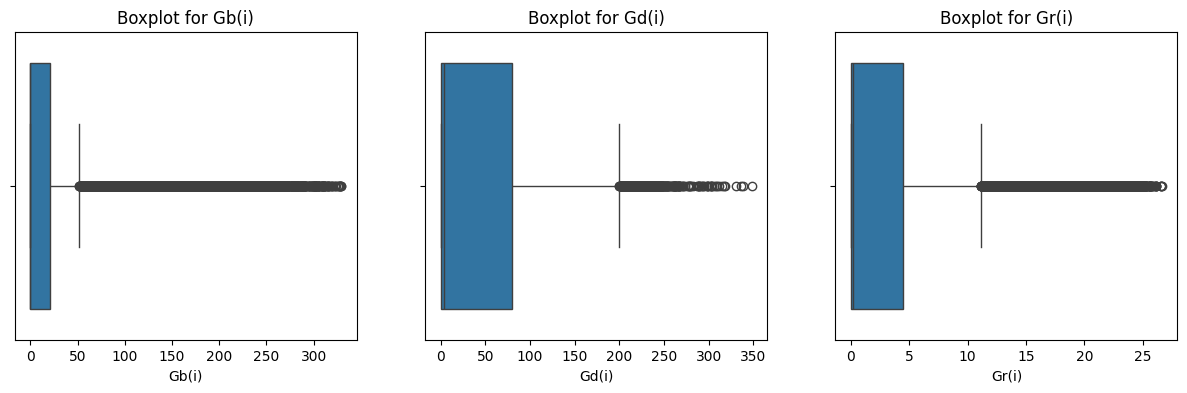

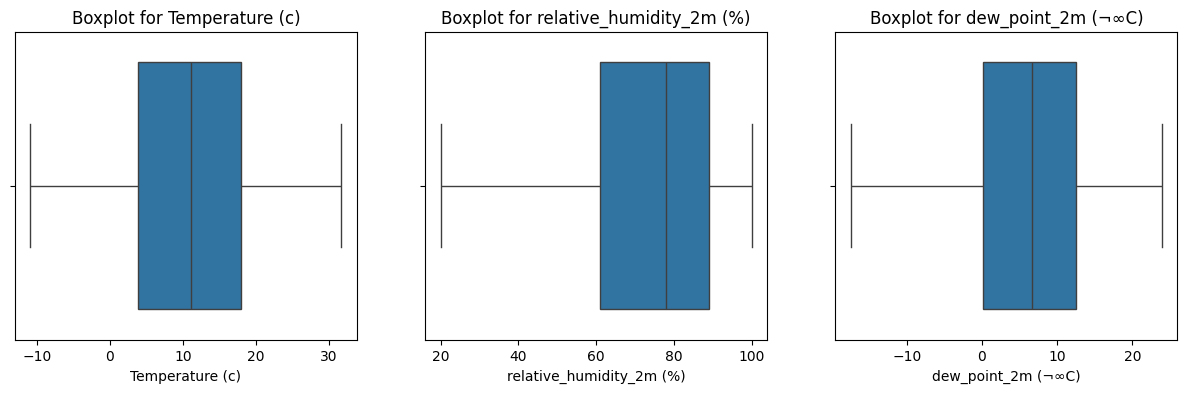

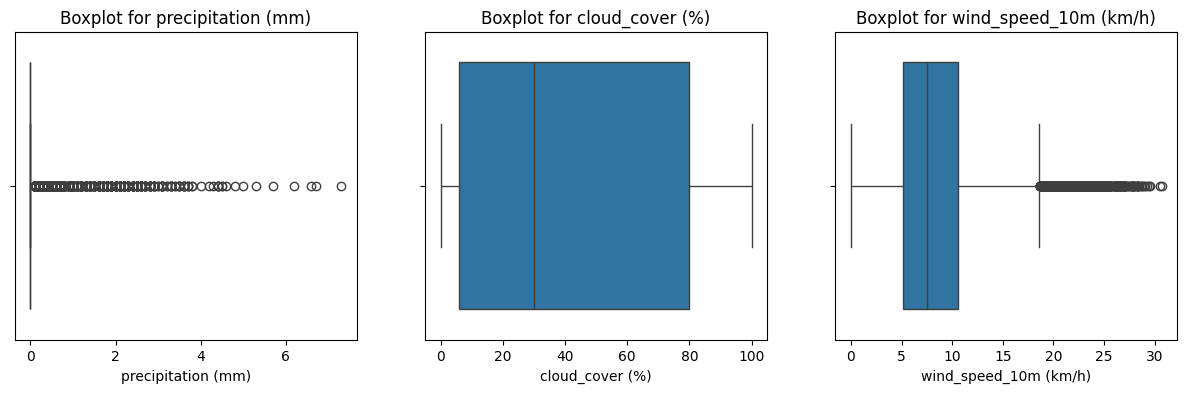

In [12]:
# Specify columns for plotting
columns_to_plot = [
    ['Consumption_B1', 'Consumption_B2', 'Consumption_B3'],
    ['Generation_1', 'Generation_2', 'Generation_3'],
    ['Gb(i)', 'Gd(i)', 'Gr(i)'],
    ['Temperature (c)', 'relative_humidity_2m (%)', 'dew_point_2m (¬∞C)'],
    ['precipitation (mm)', 'cloud_cover (%)', 'wind_speed_10m (km/h)']
]

for column_group in columns_to_plot:
    fig, axes = plt.subplots(1, len(column_group), figsize=(15, 4))  # Adjust the figure size as needed
    for i, column in enumerate(column_group):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    plt.show()

# Date Time Formating 

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Time_Interval'] // 100  # Extract the hour component
df['Minute'] = df['Time_Interval'] % 100  # Extract the minute component
df['Date_Timestamp'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h') + pd.to_timedelta(df['Minute'], unit='m')

# Feature Engineering
df['DayOfWeek'] = df['Date_Timestamp'].dt.dayofweek  # Extract day of the week (0 = Monday, 1 = Tuesday, etc.)
df['Month'] = df['Date_Timestamp'].dt.month  # Extract month
df['HourOfDay'] = df['Date_Timestamp'].dt.hour  # Extract hour of the day

# Reorder the columns with 'Date_Timestamp' as the first column
df = df[['Date_Timestamp', 'DayOfWeek', 'Month', 'HourOfDay'] + [col for col in df.columns if col not in ['Date_Timestamp', 'DayOfWeek', 'Month', 'HourOfDay']]]

# Drop the original 'Date' and 'Time_Interval' columns
df.drop(['Date', 'Time_Interval', 'Hour','Minute'], axis=1, inplace=True)
df

,Date_Timestamp,DayOfWeek,Month,HourOfDay,Consumption_B1,Consumption_B2,Consumption_B3,Generation_1,Generation_2,Generation_3,...,Gd(i),Gr(i),Temperature (c),relative_humidity_2m (%),dew_point_2m (¬∞C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),Total_Consumption,Total_Generation
0,2019-01-01 00:30:00,1,1,0,263.934730,119.965555,100.382488,0.0,0.0,0.0,...,0.0,0.0,0.24,87,-1.7,0.0,56,7.2,484.282773,0.0
1,2019-01-01 01:30:00,1,1,1,261.381617,126.873583,98.777157,0.0,0.0,0.0,...,0.0,0.0,0.33,87,-1.6,0.0,100,7.6,487.032358,0.0
2,2019-01-01 02:30:00,1,1,2,289.598378,130.980467,109.956200,0.0,0.0,0.0,...,0.0,0.0,0.36,88,-1.5,0.0,94,5.9,530.535045,0.0
3,2019-01-01 03:30:00,1,1,3,340.806009,143.535150,129.512557,0.0,0.0,0.0,...,0.0,0.0,0.21,88,-1.6,0.0,88,5.5,613.853717,0.0
4,2019-01-01 04:30:00,1,1,4,399.536718,174.588548,150.485312,0.0,0.0,0.0,...,0.0,0.0,0.03,88,-1.7,0.0,81,6.4,724.610577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2020-12-31 19:30:00,3,12,19,240.822001,185.668899,97.548156,0.0,0.0,0.0,...,0.0,0.0,2.44,99,2.2,0.0,35,4.6,524.039056,0.0
17516,2020-12-31 20:30:00,3,12,20,225.928331,178.478517,92.432246,0.0,0.0,0.0,...,0.0,0.0,1.91,100,1.8,0.0,45,4.8,496.839094,0.0
17517,2020-12-31 21:30:00,3,12,21,200.289301,164.246147,83.005720,0.0,0.0,0.0,...,0.0,0.0,1.51,100,1.4,0.0,35,4.7,447.541168,0.0
17518,2020-12-31 22:30:00,3,12,22,184.485978,145.000653,80.381694,0.0,0.0,0.0,...,0.0,0.0,1.44,99,1.2,0.0,39,5.8,409.868325,0.0


# Data transformation

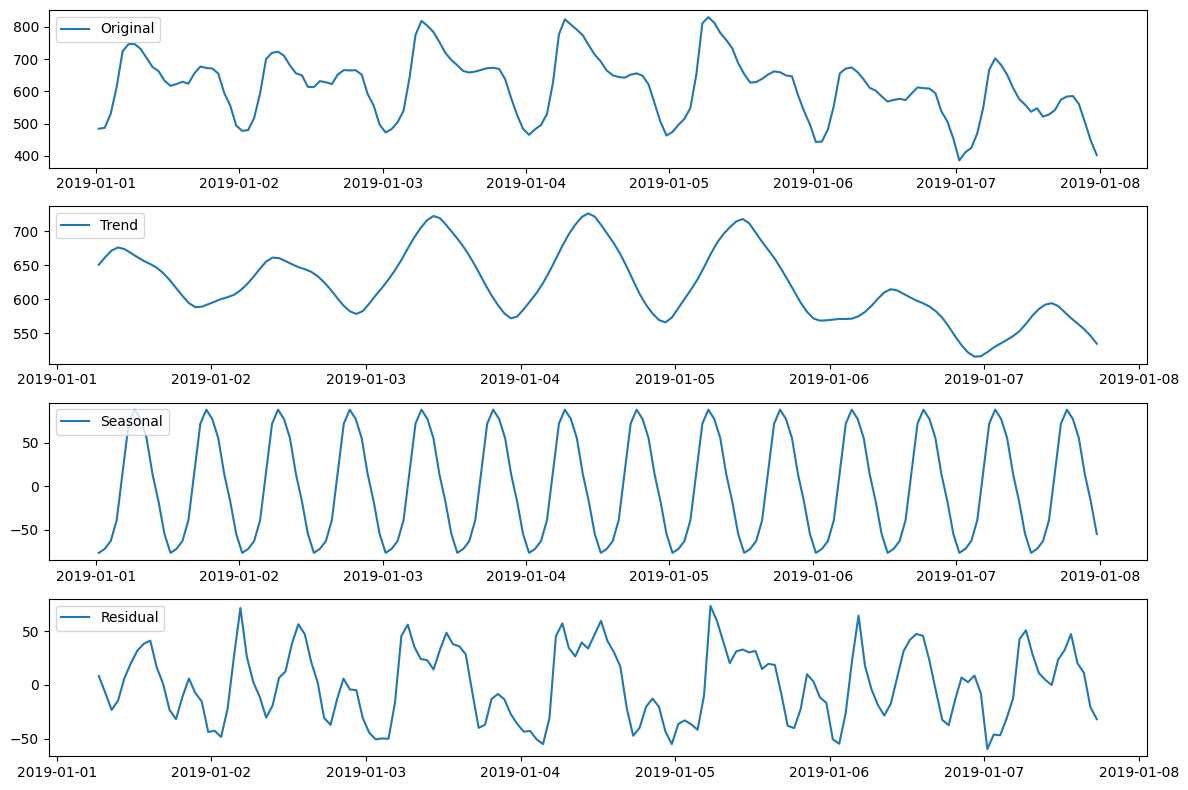

In [14]:
df.reset_index(drop=True, inplace=True)

# Assuming 'df' is your DataFrame with 'Date_Timestamp' as the datetime index
df['Date_Timestamp'] = pd.to_datetime(df['Date_Timestamp'])
df.set_index('Date_Timestamp', inplace=True)

# Choose a specific time range for better visibility
start_date = '2019-01-01'
end_date = '2019-01-07'

# Filter the DataFrame for the chosen time range
df_subset = df[start_date:end_date]

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df_subset['Total_Consumption'], model='additive', period=12)
df =df.reset_index()

# Plot the original time series, trend, seasonality, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_subset['Total_Consumption'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
df

,Date_Timestamp,DayOfWeek,Month,HourOfDay,Consumption_B1,Consumption_B2,Consumption_B3,Generation_1,Generation_2,Generation_3,...,Gd(i),Gr(i),Temperature (c),relative_humidity_2m (%),dew_point_2m (¬∞C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),Total_Consumption,Total_Generation
0,2019-01-01 00:30:00,1,1,0,263.934730,119.965555,100.382488,0.0,0.0,0.0,...,0.0,0.0,0.24,87,-1.7,0.0,56,7.2,484.282773,0.0
1,2019-01-01 01:30:00,1,1,1,261.381617,126.873583,98.777157,0.0,0.0,0.0,...,0.0,0.0,0.33,87,-1.6,0.0,100,7.6,487.032358,0.0
2,2019-01-01 02:30:00,1,1,2,289.598378,130.980467,109.956200,0.0,0.0,0.0,...,0.0,0.0,0.36,88,-1.5,0.0,94,5.9,530.535045,0.0
3,2019-01-01 03:30:00,1,1,3,340.806009,143.535150,129.512557,0.0,0.0,0.0,...,0.0,0.0,0.21,88,-1.6,0.0,88,5.5,613.853717,0.0
4,2019-01-01 04:30:00,1,1,4,399.536718,174.588548,150.485312,0.0,0.0,0.0,...,0.0,0.0,0.03,88,-1.7,0.0,81,6.4,724.610577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2020-12-31 19:30:00,3,12,19,240.822001,185.668899,97.548156,0.0,0.0,0.0,...,0.0,0.0,2.44,99,2.2,0.0,35,4.6,524.039056,0.0
17516,2020-12-31 20:30:00,3,12,20,225.928331,178.478517,92.432246,0.0,0.0,0.0,...,0.0,0.0,1.91,100,1.8,0.0,45,4.8,496.839094,0.0
17517,2020-12-31 21:30:00,3,12,21,200.289301,164.246147,83.005720,0.0,0.0,0.0,...,0.0,0.0,1.51,100,1.4,0.0,35,4.7,447.541168,0.0
17518,2020-12-31 22:30:00,3,12,22,184.485978,145.000653,80.381694,0.0,0.0,0.0,...,0.0,0.0,1.44,99,1.2,0.0,39,5.8,409.868325,0.0


# Cloud Coverage Transformation

In [16]:
# Define bins and labels for cloud cover categories
cloud_bins = [-1, 20, 40, 60, 80, 100]
cloud_labels = ['Clear', 'Mostly Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast']

# Convert 'cloud_cover' to a categorical feature and assign it to a new column
df['Cloud_Cover_Category'] = pd.cut(df['cloud_cover (%)'], bins=cloud_bins, labels=cloud_labels, include_lowest=True)

# Find the index of 'cloud_cover (%)' column
cloud_cover_index = df.columns.get_loc('cloud_cover (%)')

# Ensure the 'Cloud_Cover_Category' column is placed beside 'cloud_cover (%)'
if df.columns[cloud_cover_index + 1] != 'Cloud_Cover_Category':
    # Move the 'Cloud_Cover_Category' column next to 'cloud_cover (%)'
    df = df[list(df.columns[:cloud_cover_index + 1]) + ['Cloud_Cover_Category'] + list(df.columns[cloud_cover_index + 1:-1])]

# Display the DataFrame
print(df)


           Date_Timestamp  DayOfWeek  Month  HourOfDay  Consumption_B1  \
0     2019-01-01 00:30:00          1      1          0      263.934730   
1     2019-01-01 01:30:00          1      1          1      261.381617   
2     2019-01-01 02:30:00          1      1          2      289.598378   
3     2019-01-01 03:30:00          1      1          3      340.806009   
4     2019-01-01 04:30:00          1      1          4      399.536718   
...                   ...        ...    ...        ...             ...   
17515 2020-12-31 19:30:00          3     12         19      240.822001   
17516 2020-12-31 20:30:00          3     12         20      225.928331   
17517 2020-12-31 21:30:00          3     12         21      200.289301   
17518 2020-12-31 22:30:00          3     12         22      184.485978   
17519 2020-12-31 23:30:00          3     12         23      185.552414   

       Consumption_B2  Consumption_B3  Generation_1  Generation_2  \
0          119.965555      100.382488     

# Convert the df into CSV

In [18]:
df.to_csv('Transformed_dataset.csv', index=False)